In [35]:
#####Start of main######
#Add some exceptions if such imports are made
import stack_overflow_props as stack_props
from bs4 import BeautifulSoup
import pandas as pd
import time
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [36]:
def getQuestionId(question):
    questionList = question.split('-')
    return questionList[2]

summary = []
questionHyperLinks = []
tagsList = []
viewsList = []
voteList = []
answersList = []
questionIdList = []
#######Defining a parser to parse all data########
def parse(questionsList):
    
    for question in questionsList:
        questionId = getQuestionId(question.get('id'))
        questionSummary = question.find(class_="summary").find('h3').get_text()
        hyperLink = question.find(class_="summary").find('h3').find('a').get('href')
        questionTags = [tag.get_text().strip() for tag in question.find_all(class_="post-tag")]
        questionViews = question.find(class_="views").get_text().strip()
        noOfVotes = question.find(class_="votes").find('strong').get_text().strip()
        noOfAnswers = question.find(class_="status").find('strong').get_text().strip()
        questionIdList.append(questionId)
        summary.append(questionSummary)
        questionHyperLinks.append(stack_props.base_url+hyperLink)
        tagsList.append(questionTags)
        viewsList.append(questionViews)
        voteList.append(noOfVotes)    
        answersList.append(noOfAnswers)
    return questionIdList,summary,questionHyperLinks,tagsList,viewsList,voteList,answersList

In [37]:
###### make a request to Stack overflow url
page_range = int(stack_props.page_range)
i=1
while i <=page_range:
    resp = requests.get(stack_props.url + "&page=" + str(i))
    print(resp.status_code)
    if '2' not in str(resp.status_code):
        print("Error response has occurred")
    ######Beautiful Soup############
    soup = BeautifulSoup(resp.content,'html.parser')
    questionTags=[]
    questionsList = soup.find_all(class_="question-summary")
    #Call function##
    questionId,summary,questionHyperLinks,tags,views,votes,answers = parse(questionsList)
    time.sleep(10)
    i+=1

200


In [38]:
########Pandas Setting#################
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 800)

In [40]:
stacks = pd.DataFrame({
    "questionId":questionId,
    "summary":summary,
    "links":questionHyperLinks,
    "views":views,
    "votes":votes,
    "noOfanswers":answers,
    "tags":tags})

stacks

,links,noOfanswers,questionId,summary,tags,views,votes
0,www.stackoverflow.com/questions/11227809/why-is-it-faster-to-process-a-sorted-array-than-an-unsorted-array,21,11227809,Why is it faster to process a sorted array than an unsorted array?,"[java, c++, performance, optimization, branch-prediction]",1.2m views,20800
1,www.stackoverflow.com/questions/927358/how-to-undo-the-most-recent-commits-in-git,68,927358,How to undo the most recent commits in Git,"[git, git-commit, git-reset, git-revert]",6.1m views,16820
2,www.stackoverflow.com/questions/2003505/how-do-i-delete-a-git-branch-both-locally-and-remotely,40,2003505,How do I delete a Git branch both locally and remotely?,"[git, git-branch, git-remote]",5.4m views,12838
3,www.stackoverflow.com/questions/292357/what-is-the-difference-between-git-pull-and-git-fetch,47,292357,What is the difference between 'git pull' and 'git fetch'?,"[git, git-pull, git-fetch]",2.2m views,9514
4,www.stackoverflow.com/questions/477816/what-is-the-correct-json-content-type,34,477816,What is the correct JSON content type?,"[json, content-type]",2.1m views,8858
5,www.stackoverflow.com/questions/231767/what-does-the-yield-keyword-do,36,231767,What does the “yield” keyword do?,"[python, iterator, generator, yield, coroutine]",1.6m views,7769
6,www.stackoverflow.com/questions/179123/how-to-modify-existing-unpushed-commits,27,179123,"How to modify existing, unpushed commits?","[git, git-commit, git-rewrite-history, amend]",2.2m views,7684
7,www.stackoverflow.com/questions/503093/how-do-i-redirect-to-another-webpage,64,503093,How do I redirect to another webpage?,"[javascript, jquery, redirect]",4.6m views,7668
8,www.stackoverflow.com/questions/111102/how-do-javascript-closures-work,88,111102,How do JavaScript closures work?,"[javascript, function, variables, scope, closures]",1.2m views,7658
9,www.stackoverflow.com/questions/1642028/what-is-the-operator-in-c,21,1642028,What is the “-->” operator in C++?,"[c++, operators, code-formatting, standards-compliance]",593k views,7429


In [42]:
stacks["noOfanswers"].mean()
stacks["noOfanswers"].describe()

count     50
unique    33
top       31
freq       4
Name: noOfanswers, dtype: object

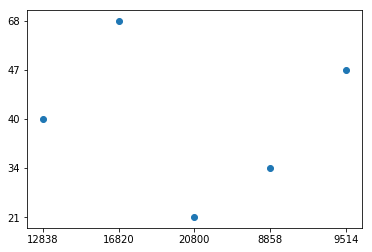

In [44]:
plt.scatter(stacks["votes"].head(),stacks["noOfanswers"].head())

In [ ]:
plt.bar(stacks["votes"].head(),stacks["answers"].head())

(-0.5, 1999.5, 999.5, -0.5)

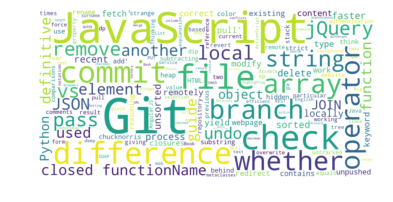

In [45]:
combinedSummary = ' '.join(stacks["summary"])

# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=2500,width=2000,height=1000)

wc.generate(combinedSummary)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")